In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
%matplotlib inline

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

In [3]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [4]:
len(messages)

5574

In [5]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [6]:
for msg_no, message in enumerate(messages[:10]):
    print(msg_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [7]:
messages = pd.read_csv('SMSSpamCollection', sep='\t', names=['Label', 'Message'])
messages.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
messages.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
messages.groupby('Label').describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [10]:
messages['Length'] = messages['Message'].apply(len)

In [11]:
messages.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


C:\Users\VEDANT NANDOSKAR\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


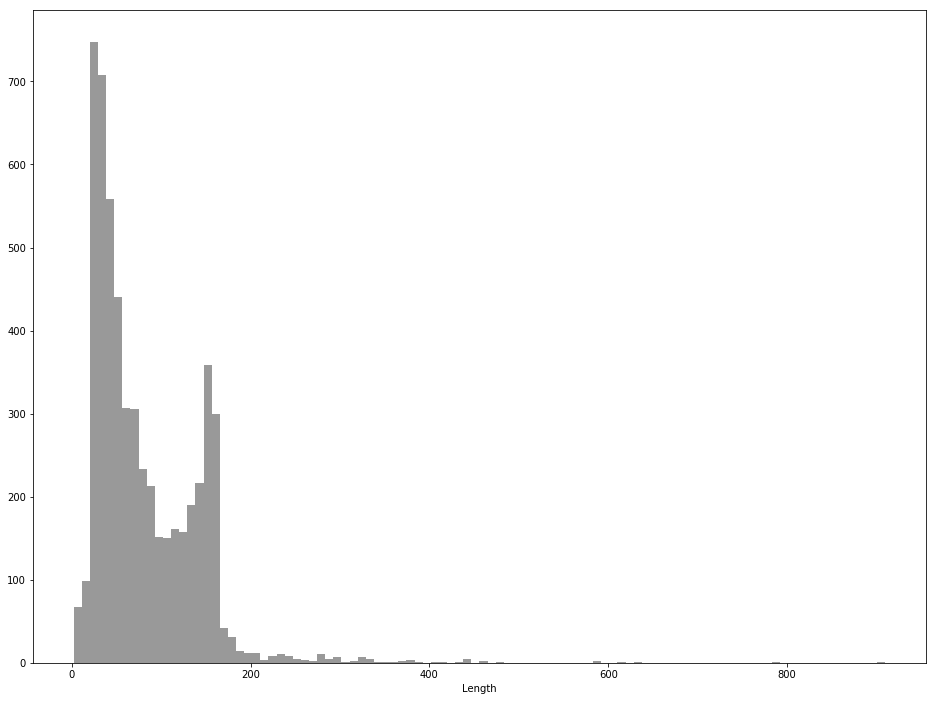

In [12]:
plt.figure(figsize=(16,12))
sns.distplot(messages['Length'], bins=100, kde=False, color='black')

In [13]:
messages['Length'].describe()

count    5572.000000
mean       80.490309
std        59.944527
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

In [14]:
messages[messages['Length'] == 910]['Message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002991DE40E10>,
      dtype=object)

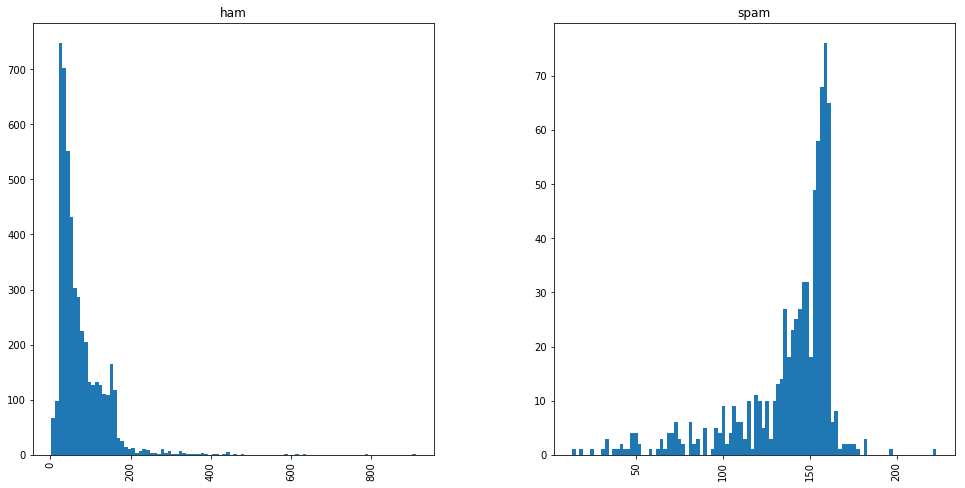

In [15]:
messages.hist(column='Length', by='Label', bins=100, figsize=(16,8))

In [16]:
import string
from nltk.corpus import stopwords

In [17]:
def split_intoWords(msg):
    
    ## Firstly remove punctuation
    noPunc = [char for char in msg if char not in string.punctuation]
    ## Then join the sepearate characters in a list
    noPunc = ''.join(noPunc)
    ## Finally return only the significant words
    return [word for word in noPunc.split() if word.lower() not in stopwords.words('english')]


In [18]:
messages['Message'].head(5).apply(split_intoWords)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
bow_transform = CountVectorizer(analyzer=split_intoWords).fit(messages['Message'])

In [21]:
print(len(bow_transform.vocabulary_))

11425


In [22]:
messages_bow = bow_transform.transform(messages['Message'])

In [24]:
print('Shape of matrix: ',messages_bow.shape)
print('Non zero occurences: ',messages_bow.nnz)

Shape of matrix:  (5572, 11425)
Non zero occurences:  50548


In [25]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [26]:
from sklearn.feature_extraction.text import TfidfTransformer

In [27]:
tfidf_transform = TfidfTransformer().fit(messages_bow)

In [28]:
messages_tfidf = tfidf_transform.transform(messages_bow)

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['Label'])

In [31]:
predictions = spam_detect_model.predict(messages_tfidf)

In [32]:
predictions

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
confusion_matrix(messages['Label'], predictions)

array([[4825,    0],
       [ 115,  632]], dtype=int64)

In [41]:
print(classification_report(messages['Label'], predictions))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



In [42]:
from sklearn.pipeline import Pipeline

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
 pipelineRf = Pipeline([
    ('bow', CountVectorizer(analyzer=split_intoWords)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

In [45]:
pipelineRf.fit(messages['Message'], messages['Label'])

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function split_intoWords at 0x000002991BDAB2F0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [49]:
predictionsRf = pipelineRf.predict(messages['Message'])

In [51]:
confusion_matrix(messages['Label'], predictionsRf)

array([[4825,    0],
       [  15,  732]], dtype=int64)

In [53]:
print(classification_report(messages['Label'], predictionsRf))

             precision    recall  f1-score   support

        ham       1.00      1.00      1.00      4825
       spam       1.00      0.98      0.99       747

avg / total       1.00      1.00      1.00      5572



In [54]:
predictionsRf

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [55]:
predictionsDf = pd.DataFrame(predictions, columns=['Naive Bayes Predcition'])

In [56]:
predictionsDf.head()

,Naive Bayes Predcition
0,ham
1,ham
2,spam
3,ham
4,ham


In [57]:
predictionsRfDf = pd.DataFrame(predictionsRf, columns=['Random Forest Predictions'])
predictionsRfDf.head()

,Random Forest Predictions
0,ham
1,ham
2,spam
3,ham
4,ham


In [58]:
messagesPred = pd.concat([messages, predictionsDf, predictionsRfDf], axis=1)

In [59]:
messagesPred

,Label,Message,Length,Naive Bayes Predcition,Random Forest Predictions
0,ham,"Go until jurong point, crazy.. Available only ...",111,ham,ham
1,ham,Ok lar... Joking wif u oni...,29,ham,ham
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,spam,spam
3,ham,U dun say so early hor... U c already then say...,49,ham,ham
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,ham,ham
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,ham,spam
6,ham,Even my brother is not like to speak with me. ...,77,ham,ham
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,ham,ham
8,spam,WINNER!! As a valued network customer you have...,157,spam,spam
9,spam,Had your mobile 11 months or more? U R entitle...,154,spam,spam


In [60]:
messagesPred.to_csv('predictions_spamOrHam_messages.csv', header=True, index_label='Index')